In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [2]:
#Read Data
df = pd.read_csv(r"C:\Users\Fathad\Desktop\video_games.csv")
df.head(5)

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [3]:
pd.set_option("display.max.columns", None)

In [4]:
#Data Cleaning
df.drop(["Metrics.Used Price","Features.Handheld?","Features.Multiplatform?","Features.Online?","Metadata.Licensed?","Metadata.Sequel?","Release.Re-release?"], axis=1, inplace=True)

In [5]:
df.columns

Index(['Title', 'Features.Max Players', 'Metadata.Genres',
       'Metadata.Publishers', 'Metrics.Review Score', 'Metrics.Sales',
       'Release.Console', 'Release.Rating', 'Release.Year',
       'Length.All PlayStyles.Average', 'Length.All PlayStyles.Leisure',
       'Length.All PlayStyles.Median', 'Length.All PlayStyles.Polled',
       'Length.All PlayStyles.Rushed', 'Length.Completionists.Average',
       'Length.Completionists.Leisure', 'Length.Completionists.Median',
       'Length.Completionists.Polled', 'Length.Completionists.Rushed',
       'Length.Main + Extras.Average', 'Length.Main + Extras.Leisure',
       'Length.Main + Extras.Median', 'Length.Main + Extras.Polled',
       'Length.Main + Extras.Rushed', 'Length.Main Story.Average',
       'Length.Main Story.Leisure', 'Length.Main Story.Median',
       'Length.Main Story.Polled', 'Length.Main Story.Rushed'],
      dtype='object')

In [6]:
df.dtypes

Title                             object
Features.Max Players               int64
Metadata.Genres                   object
Metadata.Publishers               object
Metrics.Review Score               int64
Metrics.Sales                    float64
Release.Console                   object
Release.Rating                    object
Release.Year                       int64
Length.All PlayStyles.Average    float64
Length.All PlayStyles.Leisure    float64
Length.All PlayStyles.Median     float64
Length.All PlayStyles.Polled       int64
Length.All PlayStyles.Rushed     float64
Length.Completionists.Average    float64
Length.Completionists.Leisure    float64
Length.Completionists.Median     float64
Length.Completionists.Polled       int64
Length.Completionists.Rushed     float64
Length.Main + Extras.Average     float64
Length.Main + Extras.Leisure     float64
Length.Main + Extras.Median      float64
Length.Main + Extras.Polled        int64
Length.Main + Extras.Rushed      float64
Length.Main Stor

In [7]:
df.shape

(1212, 29)

In [8]:
#Missing Values
df.isnull().sum()

Title                              0
Features.Max Players               0
Metadata.Genres                    0
Metadata.Publishers              264
Metrics.Review Score               0
Metrics.Sales                      0
Release.Console                    0
Release.Rating                     0
Release.Year                       0
Length.All PlayStyles.Average      0
Length.All PlayStyles.Leisure      0
Length.All PlayStyles.Median       0
Length.All PlayStyles.Polled       0
Length.All PlayStyles.Rushed       0
Length.Completionists.Average      0
Length.Completionists.Leisure      0
Length.Completionists.Median       0
Length.Completionists.Polled       0
Length.Completionists.Rushed       0
Length.Main + Extras.Average       0
Length.Main + Extras.Leisure       0
Length.Main + Extras.Median        0
Length.Main + Extras.Polled        0
Length.Main + Extras.Rushed        0
Length.Main Story.Average          0
Length.Main Story.Leisure          0
Length.Main Story.Median           0
L

In [9]:
name =df["Metadata.Publishers"]
name.value_counts()

EA                      165
Ubisoft                  92
Activision               87
Nintendo                 85
Sega                     75
THQ                      61
Sony                     60
2K                       49
Konami                   47
Capcom                   35
Namco                    33
SquareEnix               31
Midway                   23
Eidos                    22
Microsoft                21
Atari                    20
Rockstar                 12
Disney                   10
Atari,Namco               4
EA,Namco                  2
Nintendo,Sega             2
Namco,Sony                2
Sony,Ubisoft              2
Activision,Sony           1
EA,Sony                   1
Namco,Ubisoft             1
Nintendo,SquareEnix       1
Capcom,Rockstar           1
Activision,Konami         1
Capcom,Nintendo           1
Microsoft,SquareEnix      1
Name: Metadata.Publishers, dtype: int64

In [10]:
df.drop(["Metadata.Publishers"], axis=1, inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.iloc[3]

Title                            Hot Shots Golf: Open Tee
Features.Max Players                                    1
Metadata.Genres                                    Sports
Metrics.Review Score                                   81
Metrics.Sales                                        0.49
Release.Console                                  Sony PSP
Release.Rating                                          E
Release.Year                                         2004
Length.All PlayStyles.Average                           0
Length.All PlayStyles.Leisure                           0
Length.All PlayStyles.Median                            0
Length.All PlayStyles.Polled                            0
Length.All PlayStyles.Rushed                            0
Length.Completionists.Average                           0
Length.Completionists.Leisure                           0
Length.Completionists.Median                            0
Length.Completionists.Polled                            0
Length.Complet

In [13]:
#Droping Rows with most 0 values
df.drop([3,8,90,100,120,140,190,210,340,390,510,530,690,740,800,830,960,1120,1140,1150,1170,1190,1208,1209], axis=0, inplace=True)

In [14]:
df.head(5)

,Title,Features.Max Players,Metadata.Genres,Metrics.Review Score,Metrics.Sales,Release.Console,Release.Rating,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,Length.Completionists.Average,Length.Completionists.Leisure,Length.Completionists.Median,Length.Completionists.Polled,Length.Completionists.Rushed,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,1,Action,85,4.69,Nintendo DS,E,2004,22.716667,31.900000,24.483333,57,14.300000,29.766667,35.033333,30.000000,20,22.016667,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,1,Strategy,89,0.56,Sony PSP,E,2004,10.100000,11.016667,10.000000,5,9.516667,0.000000,0.000000,0.000000,0,0.000000,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,2,"Action,Racing / Driving,Sports",81,0.54,Nintendo DS,E,2004,4.566667,11.566667,2.500000,57,2.266667,10.000000,14.100000,7.250000,16,6.800000,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
4,Spider-Man 2,1,Action,61,0.45,Nintendo DS,E,2004,13.250000,48.383333,10.000000,37,7.066667,72.566667,78.866667,72.566667,2,66.283333,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333
5,The Urbz: Sims in the City,1,Simulation,67,0.41,Nintendo DS,M,2004,21.933333,25.500000,20.000000,7,16.733333,30.033333,30.033333,30.033333,2,30.033333,20.833333,25.200000,20.000000,3,16.450000,15.500000,15.750000,15.500000,2,15.250000


In [15]:
df.info

<bound method DataFrame.info of                               Title  Features.Max Players  \
0                 Super Mario 64 DS                     1   
1            Lumines: Puzzle Fusion                     1   
2                WarioWare Touched!                     2   
4                      Spider-Man 2                     1   
5        The Urbz: Sims in the City                     1   
...                             ...                   ...   
1205           The Legend of Kage 2                     1   
1206  Rhapsody: A Musical Adventure                     1   
1207         Secret Files: Tunguska                     1   
1210         Secret Files: Tunguska                     2   
1211                 Chicken Hunter                     1   

                     Metadata.Genres  Metrics.Review Score  Metrics.Sales  \
0                             Action                    85           4.69   
1                           Strategy                    89           0.56   
2   

In [16]:
df.describe()

,Features.Max Players,Metrics.Review Score,Metrics.Sales,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,Length.Completionists.Average,Length.Completionists.Leisure,Length.Completionists.Median,Length.Completionists.Polled,Length.Completionists.Rushed,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,1.655724,68.866162,0.509360,2006.824916,13.928998,26.780738,11.452146,45.313131,9.585985,20.208389,26.295946,19.181103,5.771886,16.732393,12.988692,19.247180,12.348064,14.278620,10.528269,8.636981,11.275238,8.448232,25.385522,7.115600
std,1.199618,12.941047,1.079308,1.043931,19.493894,51.981428,13.533759,156.265245,11.207841,47.017649,62.015852,44.401029,19.884061,40.668949,24.151698,43.263953,23.526168,57.875071,21.053192,9.713428,14.145594,9.524215,88.189366,7.982025
min,1.000000,19.000000,0.010000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,60.000000,0.090000,2006.000000,4.000000,5.000000,3.750000,1.000000,3.037500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.933333,1.179167,0.733333,1.000000,0.650000
50%,1.000000,70.000000,0.210000,2007.000000,9.116667,12.383333,8.008333,6.000000,6.816667,6.583333,7.066667,6.500000,1.000000,6.000000,7.633333,8.283333,7.183333,1.000000,6.533333,6.758333,8.133333,6.716667,4.000000,5.441667
75%,2.000000,79.000000,0.462500,2008.000000,16.450000,28.229167,14.000000,26.250000,11.904167,22.000000,28.100000,21.000000,4.000000,19.000000,16.358333,21.400000,15.000000,7.000000,13.183333,11.141667,14.829167,11.000000,15.000000,9.508333
max,8.000000,98.000000,14.660000,2008.000000,279.733333,476.266667,126.000000,2300.000000,120.200000,683.133333,691.566667,683.133333,379.000000,674.700000,291.000000,478.933333,291.000000,1100.000000,291.000000,72.383333,135.583333,70.000000,1100.000000,70.000000


In [17]:
df.shape

(1188, 28)

In [18]:
df.dtypes

Title                             object
Features.Max Players               int64
Metadata.Genres                   object
Metrics.Review Score               int64
Metrics.Sales                    float64
Release.Console                   object
Release.Rating                    object
Release.Year                       int64
Length.All PlayStyles.Average    float64
Length.All PlayStyles.Leisure    float64
Length.All PlayStyles.Median     float64
Length.All PlayStyles.Polled       int64
Length.All PlayStyles.Rushed     float64
Length.Completionists.Average    float64
Length.Completionists.Leisure    float64
Length.Completionists.Median     float64
Length.Completionists.Polled       int64
Length.Completionists.Rushed     float64
Length.Main + Extras.Average     float64
Length.Main + Extras.Leisure     float64
Length.Main + Extras.Median      float64
Length.Main + Extras.Polled        int64
Length.Main + Extras.Rushed      float64
Length.Main Story.Average        float64
Length.Main Stor

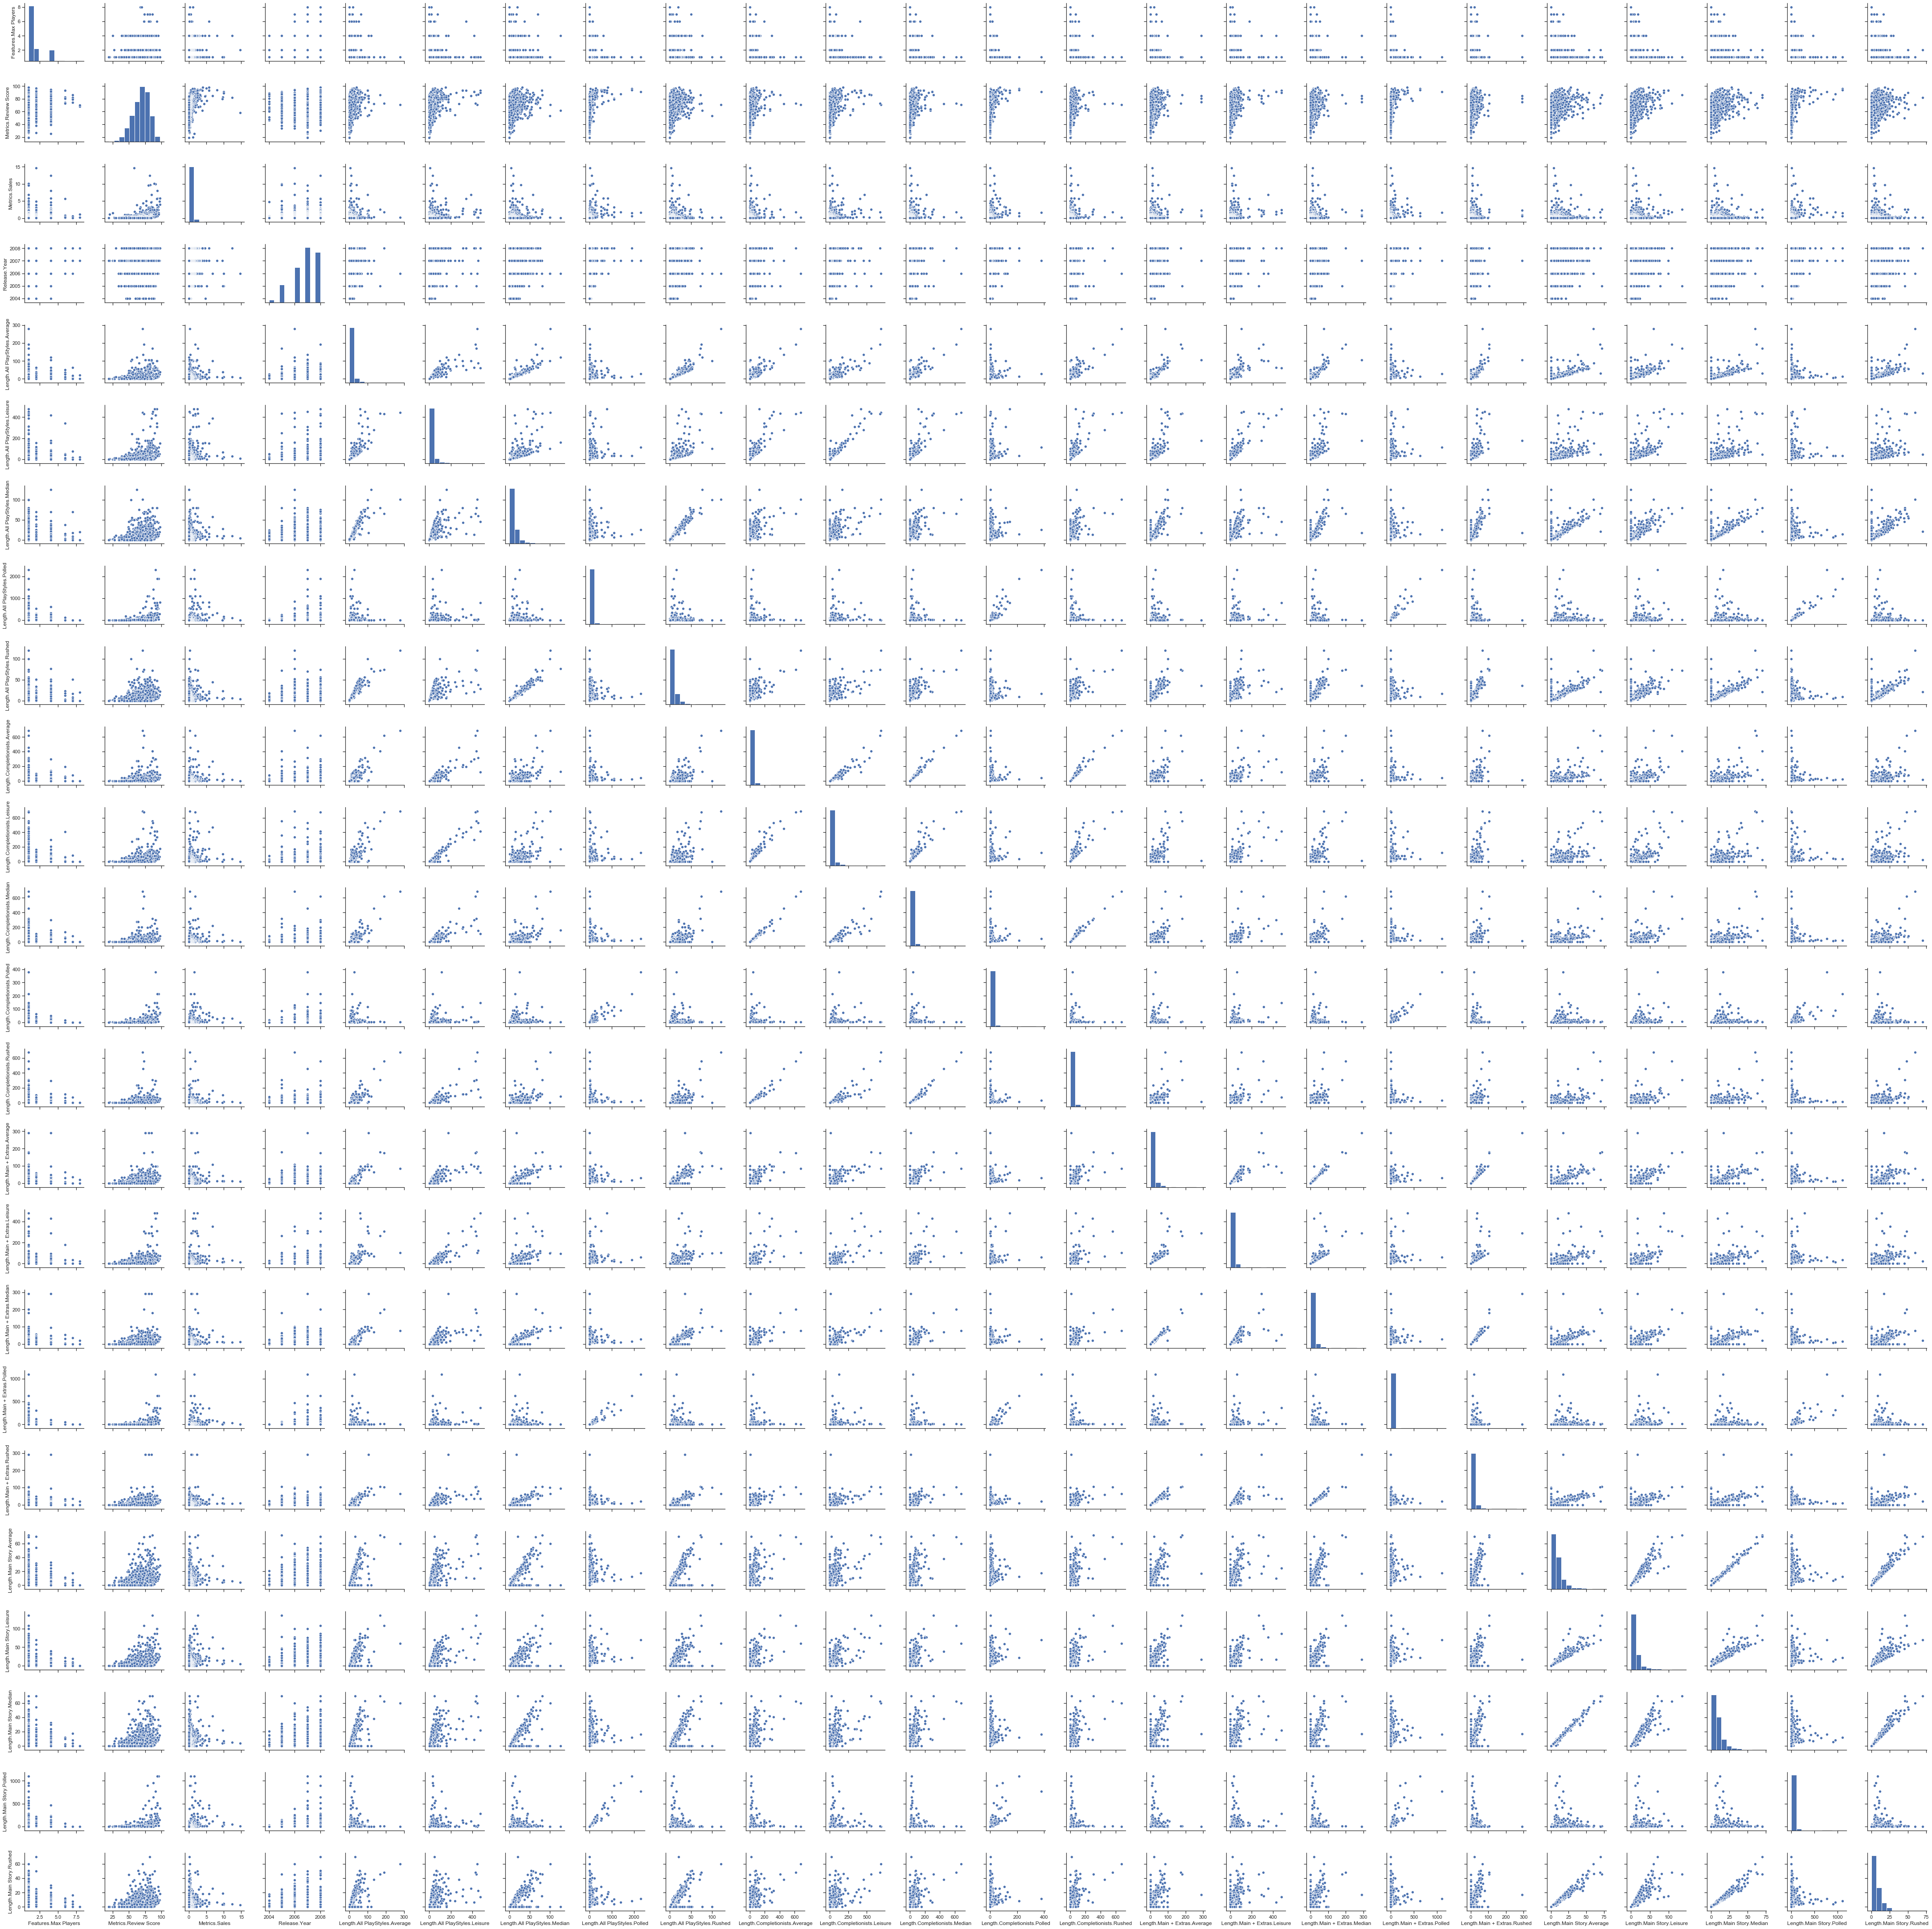

In [100]:
import seaborn as sb
sb.pairplot(df)

In [19]:
df_groupby= df.groupby(["Title"],axis=0).mean()
df_top30 = df_groupby.sort_values(by=["Metrics.Review Score"], axis=0, ascending=False).head(30)
df_top30 = df_top30[["Metrics.Review Score"]].head(30)
df_top30

,Metrics.Review Score
Title,
Grand Theft Auto IV,98.0
Super Mario Galaxy,97.0
The Orange Box,96.0
The Legend of Zelda: Twilight Princess,95.0
LittleBigPlanet,95.0
BioShock,95.0
Gears of War,94.0
Metal Gear Solid 4: Guns of the Patriots,94.0
Halo 3,94.0


[Text(0, 0.5, 'Games'), Text(0.5, 0, 'Score'), Text(0.5, 1.0, 'Top10 Games')]

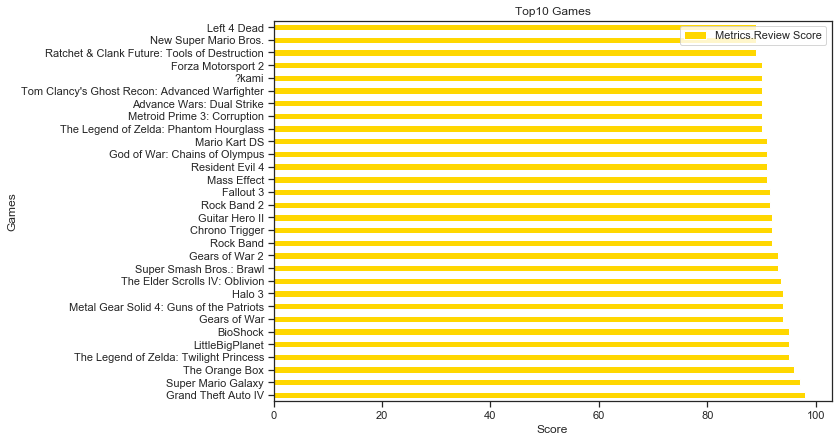

In [20]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
df_top30.plot(kind="barh", figsize=(10,7), color=colors_list).set(xlabel="Score", ylabel="Games", title="Top10 Games")

In [21]:
df_title= df.groupby(["Release.Year"],axis=0).count()
df_title[["Title"]]

,Title
Release.Year,
2004,20
2005,130
2006,259
2007,408
2008,371


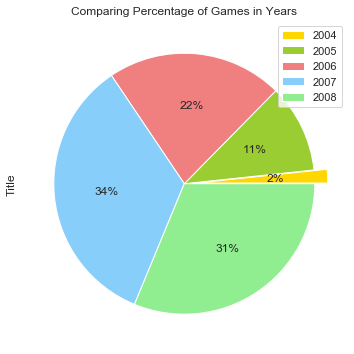

In [22]:
explode_list = [0.1, 0, 0, 0, 0] 
df_title["Title"].plot(kind="pie", figsize = (10,6), explode=explode_list, autopct="%0.0f%%",labels=None, colors=colors_list, radius =1).set(title = "Comparing Percentage of Games in Years")
plt.legend(labels = df_title.index, loc="upper right")

In [24]:
df_title= df.groupby(["Title"],axis=0).mean()
df_top20 = df_title.sort_values(by=["Features.Max Players"], axis=0, ascending=False).head(30)
df_top20 =df_top20[["Features.Max Players"]].head(20)
df_top20.head(30)

,Features.Max Players
Title,
Big Brain Academy: Wii Degree,8.000000
SingStar ABBA,8.000000
NHL 2K8,7.000000
NHL 08,7.000000
NBA 2K7,7.000000
NBA 2K8,7.000000
NBA 2K9,7.000000
Winning Eleven: Pro Evolution Soccer 2007,6.000000
WarioWare: Smooth Moves,6.000000


[Text(0, 0.5, 'Games'),
 Text(0.5, 0, 'Number of Players'),
 Text(0.5, 1.0, 'Number of Players of Top10 Games')]

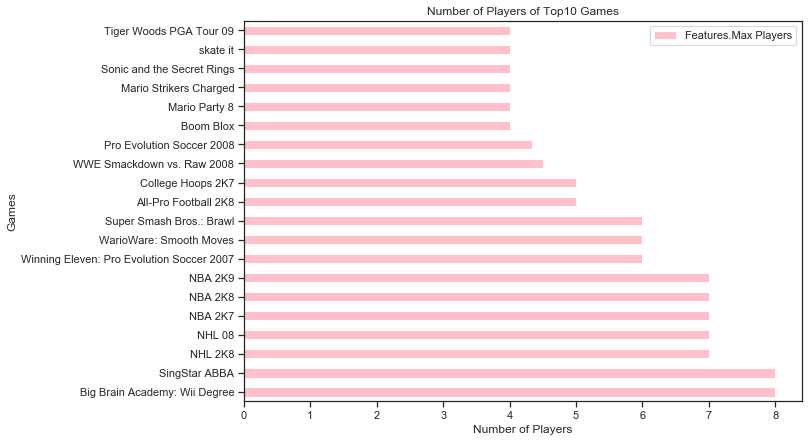

In [25]:
df_top20.plot(kind="barh", figsize=(10,7), color=['pink']).set(xlabel="Number of Players", ylabel="Games", title="Number of Players of Top10 Games")

In [27]:
df_genre = df.groupby(["Metadata.Genres"], axis=0).count()
df_top20 = df_genre.sort_values(by = ["Title"], axis=0, ascending=False).head(20)
df_top20 = df_top20[["Title"]]
df_top20

,Title
Metadata.Genres,
Action,473
Sports,153
Strategy,60
"Action,Role-Playing (RPG)",55
Racing / Driving,53
Role-Playing (RPG),52
"Action,Strategy",43
"Action,Racing / Driving",40
Simulation,29


[Text(0, 0.5, 'Genre'),
 Text(0.5, 0, 'Numbers'),
 Text(0.5, 1.0, 'Top10 Genres')]

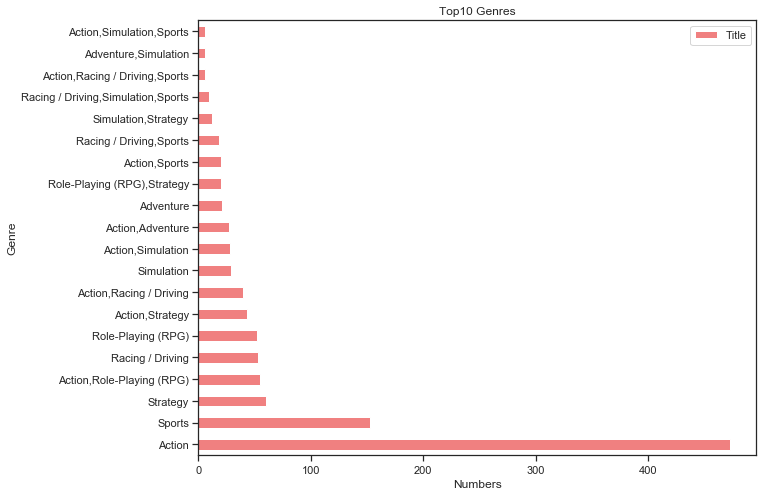

In [28]:
df_top20.plot(kind="barh", figsize=(10,8), color='lightcoral').set(xlabel ="Numbers", ylabel="Genre", title="Top10 Genres")

In [29]:
df_title = df.groupby(["Title"], axis=0).mean()
df_top20 = df_title.sort_values(by=["Metrics.Sales"], axis=0, ascending=True).tail(20)
df_top20 = df_top20[["Metrics.Sales"]]
df_top20

,Metrics.Sales
Title,
The Legend of Zelda: Twilight Princess,3.330
Brain Agey: More Training in Minutes a Day!,3.650
Gears of War,3.700
Mario Party 8,3.840
Gears of War 2,3.900
Mario Party DS,4.340
Super Mario 64 DS,4.690
Grand Theft Auto IV,4.835
Super Mario Galaxy,4.940


[Text(0, 0.5, 'Games'),
 Text(0.5, 0, 'Sales'),
 Text(0.5, 1.0, 'Top20 Sale Games')]

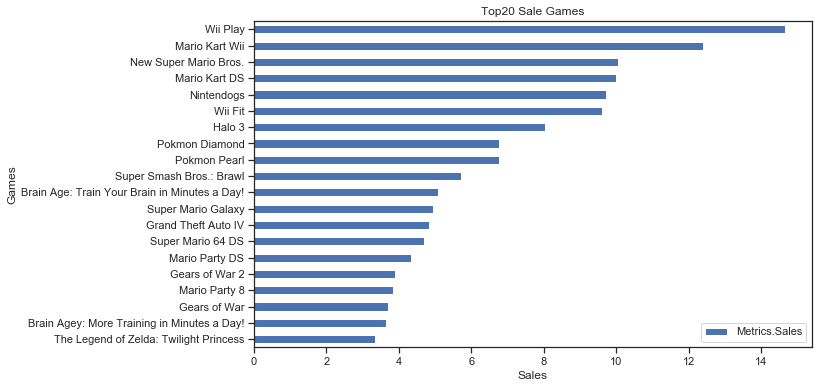

In [30]:
df_top20.plot(kind = "barh", figsize=(10,6)).set(xlabel="Sales", ylabel="Games", Title="Top20 Sale Games")

In [31]:
rate =df["Release.Rating"]
rate.value_counts()

E    481
T    462
M    245
Name: Release.Rating, dtype: int64

In [32]:
df_rate = df.groupby(["Release.Rating"], axis=0).count()
df_rate[["Title"]]

,Title
Release.Rating,
E,481
M,245
T,462


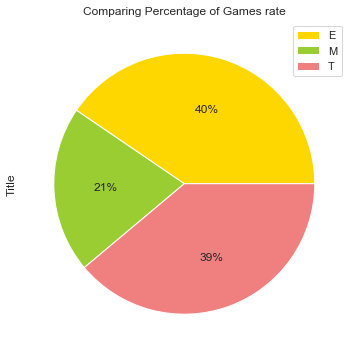

In [33]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
df_rate["Title"].plot(kind = "pie", figsize = (10,6), autopct="%0.0f%%",labels=None, colors=colors_list, radius =1).set(title = "Comparing Percentage of Games rate")
plt.legend(labels = df_rate.index, loc="upper right")

In [34]:
df_title = df.groupby(["Title"], axis=0).mean().head(10)
Duration_Reported = df_title[["Length.All PlayStyles.Average","Length.All PlayStyles.Leisure","Length.All PlayStyles.Median","Length.All PlayStyles.Rushed"]].head(10)
Duration_Reported_sort = Duration_Reported.sort_values(by=["Length.All PlayStyles.Average","Length.All PlayStyles.Leisure","Length.All PlayStyles.Median","Length.All PlayStyles.Rushed"], axis=0,ascending=False).head(10)
Duration_Reported_sort

,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Rushed
Title,,,,
Advance Wars: Dual Strike,70.366667,249.550000,27.833333,33.550000
?kami,44.966667,73.116667,41.500000,29.033333
Advance Wars: Days of Ruin,33.933333,68.983333,22.000000,19.483333
Ace Combat 6: Fires of Liberation,13.450000,17.300000,13.750000,9.116667
7 Wonders of the Ancient World,7.483333,11.833333,4.850000,4.466667
300: March to Glory,7.400000,7.400000,7.400000,7.400000
007: From Russia with Love,6.383333,6.716667,6.500000,5.883333
Ace Combat X: Skies of Deception,4.883333,8.500000,4.116667,3.083333
AC/DC Live: Rock Band - Track Pack,3.633333,4.883333,3.933333,2.766667


In [35]:
df3 = Duration_Reported_sort.drop(["ATV Offroad Fury: Blazin' Trails"], axis=0)

[Text(0, 0.5, 'Duration'),
 Text(0.5, 0, 'Games'),
 Text(0.5, 1.0, 'Comparing The Time of Completing Each Games in Each Situation')]

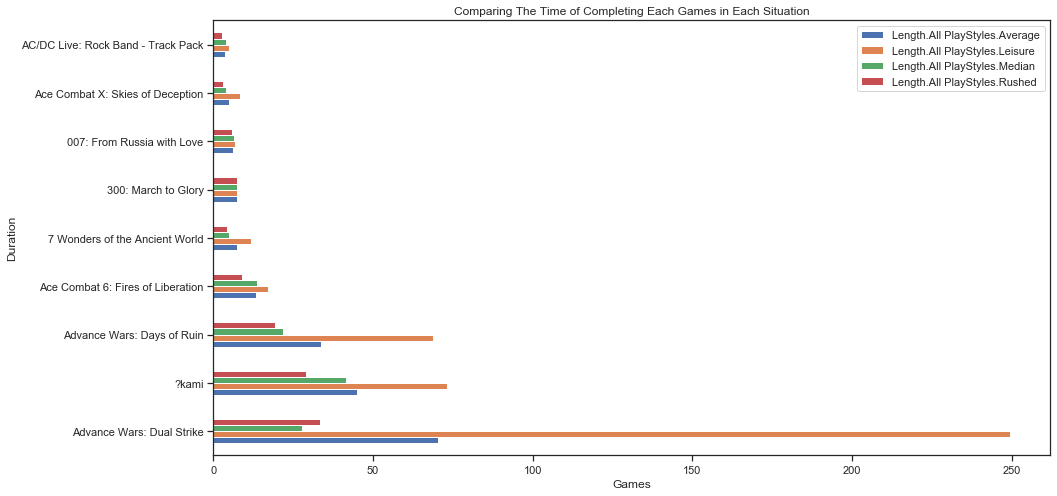

In [36]:
df3.plot(kind ="barh", figsize=(15,8)).set(xlabel = "Games", ylabel="Duration", title="Comparing The Time of Completing Each Games in Each Situation")

[Text(0, 0.5, 'Duration'),
 Text(0.5, 0, 'Games'),
 Text(0.5, 1.0, 'Comparing The Time of Completing anyway Each Games in Each Situation')]

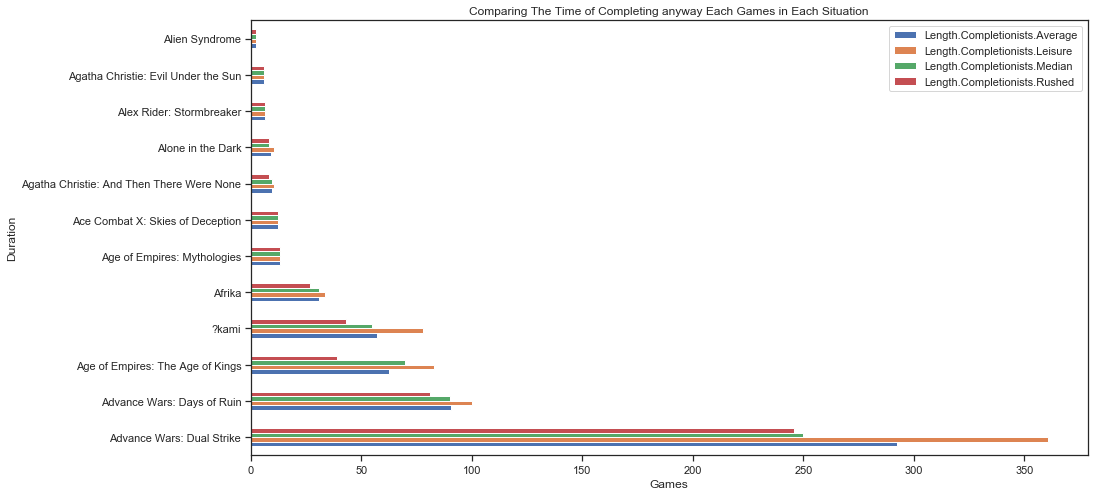

In [37]:
df_title = df.groupby(["Title"], axis=0).mean().head(20)
Completionists_Reported = df_title[["Length.Completionists.Average","Length.Completionists.Leisure","Length.Completionists.Median","Length.Completionists.Rushed"]].head(20)
Completionists_Reported_sort = Completionists_Reported.sort_values(by=["Length.Completionists.Average","Length.Completionists.Leisure","Length.Completionists.Median","Length.Completionists.Rushed"], axis=0,ascending=False).head(20)
df3 = Completionists_Reported_sort.drop(["007: From Russia with Love","300: March to Glory","7 Wonders of the Ancient World","AC/DC Live: Rock Band - Track Pack","ATV Offroad Fury: Blazin' Trails","Ace Combat 6: Fires of Liberation","After Burner: Black Falcon","All-Pro Football 2K8"], axis=0)
df3.plot(kind ="barh", figsize=(15,8)).set(xlabel = "Games", ylabel="Duration", title="Comparing The Time of Completing anyway Each Games in Each Situation")

[Text(0, 0.5, 'Duration'),
 Text(0.5, 0, 'Games'),
 Text(0.5, 1.0, 'Comparing The Time of Completing Main Games & Extras in Each Situation')]

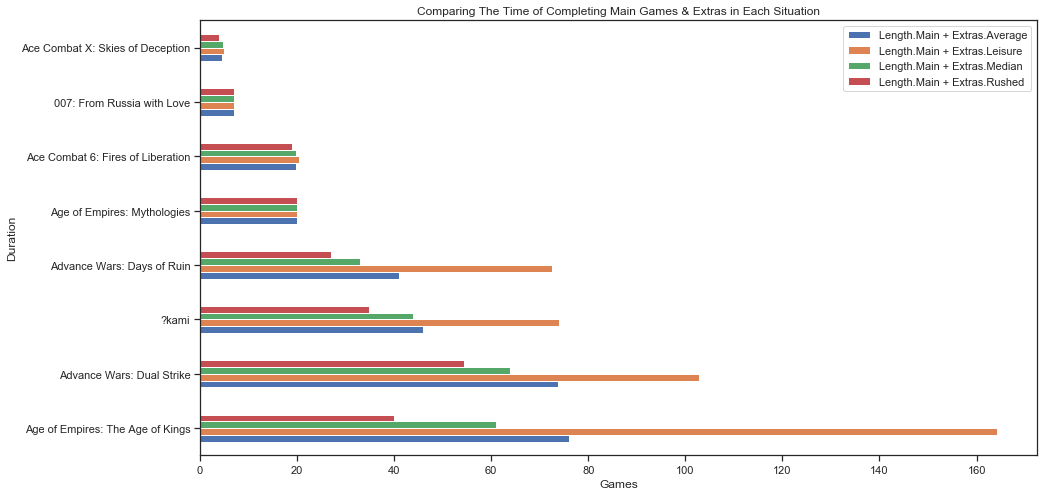

In [38]:
df_title = df.groupby(["Title"], axis=0).mean().head(20)
Lenght_Extras_Reported = df_title[["Length.Main + Extras.Average","Length.Main + Extras.Leisure","Length.Main + Extras.Median","Length.Main + Extras.Rushed"]].head(20)
Lenght_Extras_Reported_sort = Lenght_Extras_Reported.sort_values(by=["Length.Main + Extras.Average","Length.Main + Extras.Leisure","Length.Main + Extras.Median","Length.Main + Extras.Rushed"], axis=0,ascending=False).head(20)
df3 = Lenght_Extras_Reported_sort.drop(["Alex Rider: Stormbreaker","Afrika","Agatha Christie: And Then There Were None","Agatha Christie: Evil Under the Sun","Alone in the Dark","300: March to Glory","7 Wonders of the Ancient World","AC/DC Live: Rock Band - Track Pack","ATV Offroad Fury: Blazin' Trails","All-Pro Football 2K8","After Burner: Black Falcon","Alien Syndrome"], axis=0)
df3.plot(kind ="barh", figsize=(15,8)).set(xlabel = "Games", ylabel="Duration", title="Comparing The Time of Completing Main Games & Extras in Each Situation")

[Text(0, 0.5, 'Duration'),
 Text(0.5, 0, 'Games'),
 Text(0.5, 1.0, 'Comparing The Time of Completing the Storyline of Each Situation')]

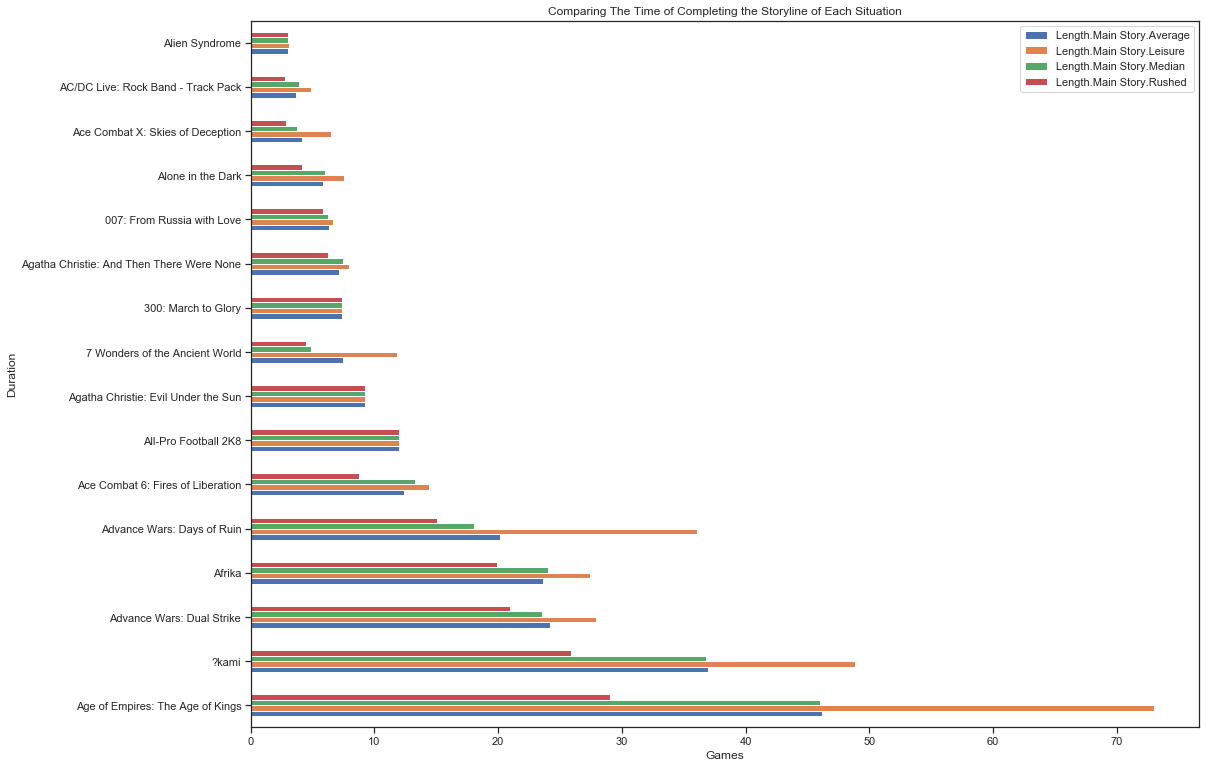

In [39]:
df_title = df.groupby(["Title"], axis=0).mean().head(20)
Lenght_Extras_Reported = df_title[["Length.Main Story.Average","Length.Main Story.Leisure","Length.Main Story.Median","Length.Main Story.Rushed"]].head(20)
Lenght_Extras_Reported_sort = Lenght_Extras_Reported.sort_values(by=["Length.Main Story.Average","Length.Main Story.Leisure","Length.Main Story.Median","Length.Main Story.Rushed"], axis=0,ascending=False).head(20)
df3 = Lenght_Extras_Reported_sort.drop(["Alex Rider: Stormbreaker","Age of Empires: Mythologies","ATV Offroad Fury: Blazin' Trails","After Burner: Black Falcon"], axis=0)
df3.plot(kind ="barh", figsize=(17,13)).set(xlabel = "Games", ylabel="Duration", title="Comparing The Time of Completing the Storyline of Each Situation")

[Text(0, 0.5, 'Number'),
 Text(0.5, 0, 'Games'),
 Text(0.5, 1.0, 'Comparing The Number of people Reporting for of Each Game')]

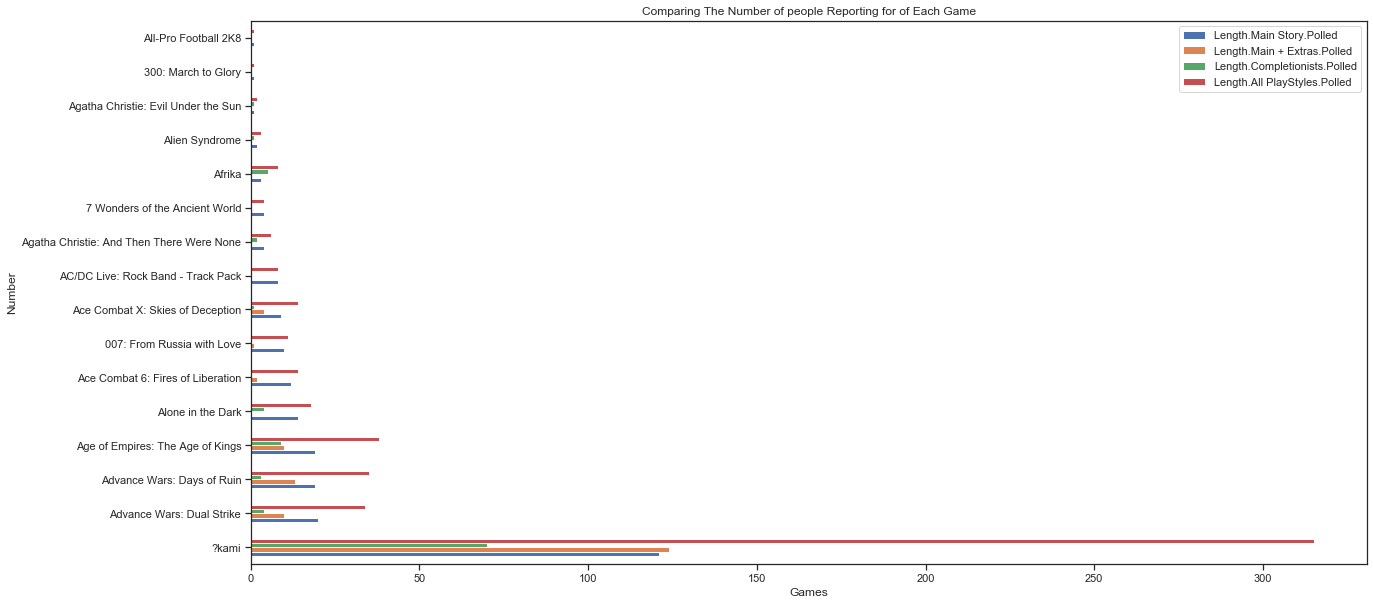

In [40]:
df_title = df.groupby(["Title"], axis=0).mean().head(20)
df_No = df_title[["Length.Main Story.Polled","Length.Main + Extras.Polled","Length.Completionists.Polled","Length.All PlayStyles.Polled"]].head(20)
df_No_sort = df_No.sort_values(by=["Length.Main Story.Polled","Length.Main + Extras.Polled","Length.Completionists.Polled","Length.All PlayStyles.Polled"], axis=0,ascending=False).head(20)
df3 = df_No_sort.drop(["Age of Empires: Mythologies","Alex Rider: Stormbreaker","ATV Offroad Fury: Blazin' Trails","After Burner: Black Falcon"])
df3.plot(kind ="barh", figsize=(20,10)).set(xlabel = "Games", ylabel="Number", title="Comparing The Number of people Reporting for of Each Game")

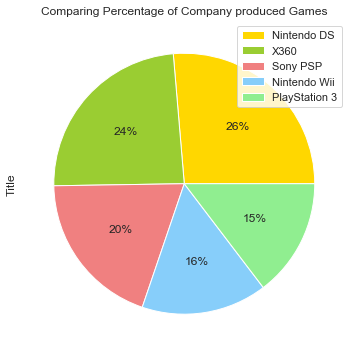

In [41]:
df_game = df.groupby(["Release.Console"], axis=0).count()
df_select =df_game[["Title"]]
df_select=df_select.sort_values(by=["Title"],axis=0,ascending=False)
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
df_select["Title"].plot(kind = "pie", figsize = (10,6), autopct="%0.0f%%",labels=None, colors=colors_list, radius =1).set(title = "Comparing Percentage of Company produced Games")
plt.legend(labels = df_select.index, loc="upper right")

In [42]:
df_group = df.groupby(["Release.Year"],axis=0).count()
df_top10 =df_group.sort_values(by=["Release.Year"], axis=0, ascending=False)
df_top10 = df_top10[["Title"]]
df_top10

,Title
Release.Year,
2008,371
2007,408
2006,259
2005,130
2004,20


[Text(0, 0.5, 'Games Number'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Comparing Artist & Song Hotness of Top10 Artists')]

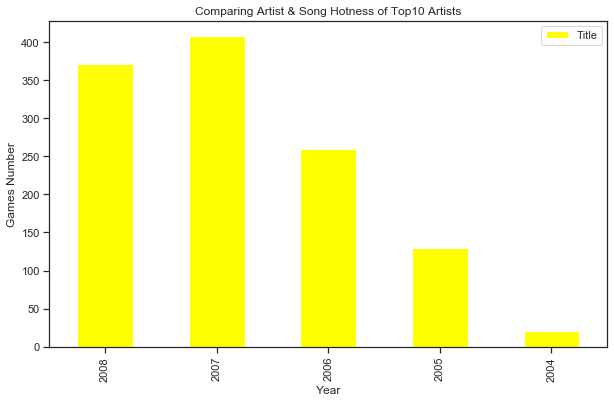

In [43]:
df_top10.plot(kind = "bar", figsize =(10,6), color="yellow").set(xlabel = "Year", ylabel ="Games Number", title="Comparing Artist & Song Hotness of Top10 Artists")

In [44]:
condition1 =df[(df["Metadata.Genres"]=="Simulation")&(df["Release.Rating"]=="M")]
condition1 =condition1.loc[:,["Title","Metrics.Review Score"]]
condition1_group =condition1.groupby(["Title"], axis=0).mean()
condition1_group = condition1_group.sort_values(["Metrics.Review Score"], axis=0, ascending=False)
condition1_group

,Metrics.Review Score
Title,
SimCity Creator,69
Cooking Mama,67
The Urbz: Sims in the City,67
The Sims 2: Castaway,66
Cooking Mama: Cook Off,61
Sega Casino,61
Dream Pinball 3D,54
The Sims 2: Apartment Pets,50


In [45]:
condition2 =df[(df["Metadata.Genres"]=="Simulation")&(df["Release.Rating"]=="T")]
condition2 = condition2.loc[:,["Title","Metrics.Review Score"]]
condition2_group =condition2.groupby(["Title"], axis=0).mean()
condition2_group = condition2_group.sort_values(["Metrics.Review Score"], axis=0, ascending=False)
condition2_group

,Metrics.Review Score
Title,
Animal Crossing: Wild World,86.0
Pinball Hall of Fame: The Williams Collection,80.0
Animal Crossing: City Folk,73.0
Electroplankton,71.0
SimCity DS,69.0
The Sims 2: Castaway,68.5
Guitar Rock Tour,60.0
The Sims 2: Pets,57.0
Brooktown High,51.0


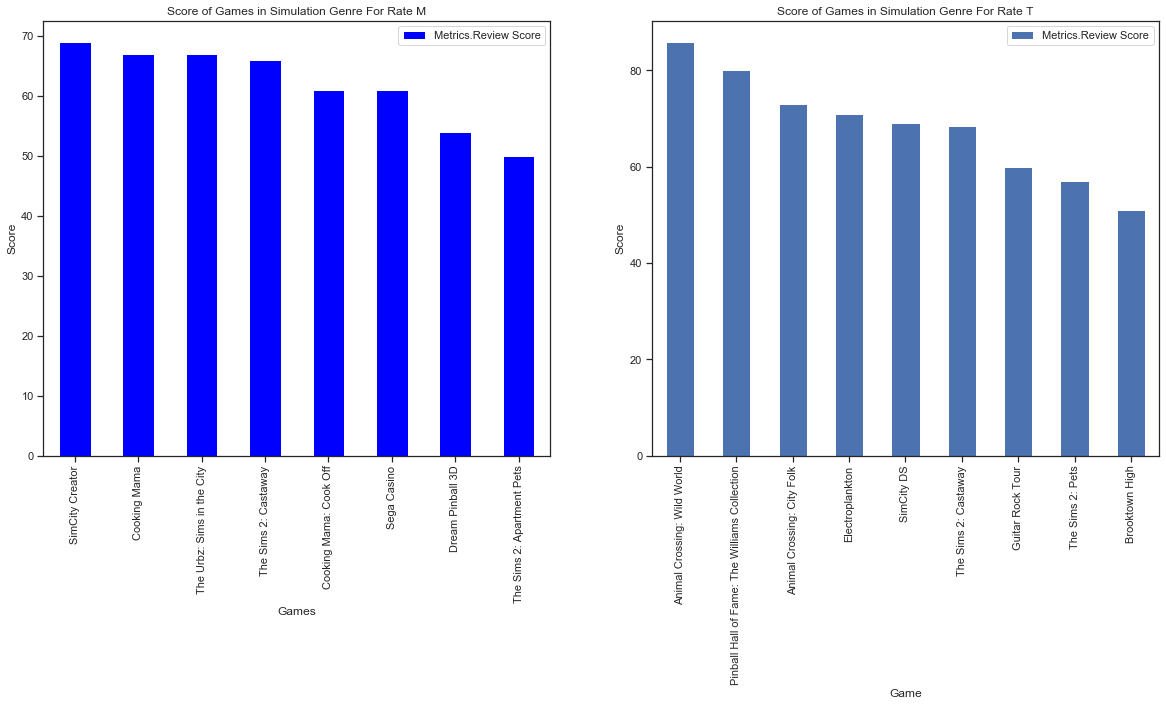

In [46]:
fig = plt.figure() 
ax0 = fig.add_subplot(1,2,1)
ax1= fig.add_subplot(1,2,2)

condition1_group.plot(kind = "bar", color="blue",figsize=(20, 8), ax=ax0).set(xlabel = "Games", ylabel ="Score")
ax0.set_title("Score of Games in Simulation Genre For Rate M")

condition2_group.plot(kind = "bar", figsize=(20, 8), ax=ax1).set(xlabel = "Game", ylabel ="Score")
ax1.set_title("Score of Games in Simulation Genre For Rate T")

plt.show()

In [90]:
df.loc[df.Title == "Iron Man"]

,Title,Features.Max Players,Metadata.Genres,Metrics.Review Score,Metrics.Sales,Release.Console,Release.Rating,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,Length.Completionists.Average,Length.Completionists.Leisure,Length.Completionists.Median,Length.Completionists.Polled,Length.Completionists.Rushed,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
941,Iron Man,1,Action,44,0.46,Sony PSP,E,2008,5.8,10.666667,5.0,12,4.233333,9.983333,12.466667,8.0,3,7.483333,5.083333,5.083333,5.083333,1,5.083333,4.333333,4.683333,4.366667,8,3.716667
973,Iron Man,1,Action,56,0.33,Nintendo DS,M,2008,5.8,10.666667,5.0,12,4.233333,9.983333,12.466667,8.0,3,7.483333,5.083333,5.083333,5.083333,1,5.083333,4.333333,4.683333,4.366667,8,3.716667
976,Iron Man,1,Action,42,0.33,PlayStation 3,T,2008,5.8,10.666667,5.0,12,4.233333,9.983333,12.466667,8.0,3,7.483333,5.083333,5.083333,5.083333,1,5.083333,4.333333,4.683333,4.366667,8,3.716667
986,Iron Man,1,Action,44,0.30,Nintendo Wii,T,2008,5.8,10.666667,5.0,12,4.233333,9.983333,12.466667,8.0,3,7.483333,5.083333,5.083333,5.083333,1,5.083333,4.333333,4.683333,4.366667,8,3.716667
996,Iron Man,1,Action,45,0.28,X360,M,2008,5.8,10.666667,5.0,12,4.233333,9.983333,12.466667,8.0,3,7.483333,5.083333,5.083333,5.083333,1,5.083333,4.333333,4.683333,4.366667,8,3.716667


In [48]:
df.head(5)

,Title,Features.Max Players,Metadata.Genres,Metrics.Review Score,Metrics.Sales,Release.Console,Release.Rating,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,Length.Completionists.Average,Length.Completionists.Leisure,Length.Completionists.Median,Length.Completionists.Polled,Length.Completionists.Rushed,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,1,Action,85,4.69,Nintendo DS,E,2004,22.716667,31.900000,24.483333,57,14.300000,29.766667,35.033333,30.000000,20,22.016667,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,1,Strategy,89,0.56,Sony PSP,E,2004,10.100000,11.016667,10.000000,5,9.516667,0.000000,0.000000,0.000000,0,0.000000,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,2,"Action,Racing / Driving,Sports",81,0.54,Nintendo DS,E,2004,4.566667,11.566667,2.500000,57,2.266667,10.000000,14.100000,7.250000,16,6.800000,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
4,Spider-Man 2,1,Action,61,0.45,Nintendo DS,E,2004,13.250000,48.383333,10.000000,37,7.066667,72.566667,78.866667,72.566667,2,66.283333,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333
5,The Urbz: Sims in the City,1,Simulation,67,0.41,Nintendo DS,M,2004,21.933333,25.500000,20.000000,7,16.733333,30.033333,30.033333,30.033333,2,30.033333,20.833333,25.200000,20.000000,3,16.450000,15.500000,15.750000,15.500000,2,15.250000


In [56]:
#Classification
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
print('Libraries Imported')

Libraries Imported


In [81]:
#get dummies to change string to ininteger
data2 = pd.DataFrame(pd.get_dummies(df, columns =['Metadata.Genres','Release.Console']))
data2.head(2)

,Title,Features.Max Players,Metrics.Review Score,Metrics.Sales,Release.Rating,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,Length.Completionists.Average,Length.Completionists.Leisure,Length.Completionists.Median,Length.Completionists.Polled,Length.Completionists.Rushed,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed,Metadata.Genres_Action,"Metadata.Genres_Action,Adventure","Metadata.Genres_Action,Adventure,Racing / Driving","Metadata.Genres_Action,Adventure,Racing / Driving,Sports","Metadata.Genres_Action,Adventure,Role-Playing (RPG)","Metadata.Genres_Action,Adventure,Strategy","Metadata.Genres_Action,Educational","Metadata.Genres_Action,Racing / Driving","Metadata.Genres_Action,Racing / Driving,Role-Playing (RPG)","Metadata.Genres_Action,Racing / Driving,Role-Playing (RPG),Strategy","Metadata.Genres_Action,Racing / Driving,Simulation","Metadata.Genres_Action,Racing / Driving,Sports","Metadata.Genres_Action,Racing / Driving,Sports,Strategy","Metadata.Genres_Action,Role-Playing (RPG)","Metadata.Genres_Action,Role-Playing (RPG),Simulation","Metadata.Genres_Action,Role-Playing (RPG),Simulation,Sports,Strategy","Metadata.Genres_Action,Role-Playing (RPG),Strategy","Metadata.Genres_Action,Simulation","Metadata.Genres_Action,Simulation,Sports","Metadata.Genres_Action,Simulation,Strategy","Metadata.Genres_Action,Sports","Metadata.Genres_Action,Strategy",Metadata.Genres_Adventure,"Metadata.Genres_Adventure,Educational,Strategy","Metadata.Genres_Adventure,Role-Playing (RPG)","Metadata.Genres_Adventure,Role-Playing (RPG),Strategy","Metadata.Genres_Adventure,Simulation","Metadata.Genres_Adventure,Simulation,Sports",Metadata.Genres_Educational,"Metadata.Genres_Educational,Simulation","Metadata.Genres_Educational,Sports","Metadata.Genres_Educational,Strategy",Metadata.Genres_Racing / Driving,"Metadata.Genres_Racing / Driving,Simulation","Metadata.Genres_Racing / Driving,Simulation,Sports","Metadata.Genres_Racing / Driving,Simulation,Strategy","Metadata.Genres_Racing / Driving,Sports",Metadata.Genres_Role-Playing (RPG),"Metadata.Genres_Role-Playing (RPG),Simulation","Metadata.Genres_Role-Playing (RPG),Simulation,Strategy","Metadata.Genres_Role-Playing (RPG),Strategy",Metadata.Genres_Simulation,"Metadata.Genres_Simulation,Sports","Metadata.Genres_Simulation,Sports,Strategy","Metadata.Genres_Simulation,Strategy",Metadata.Genres_Sports,"Metadata.Genres_Sports,Strategy",Metadata.Genres_Strategy,Release.Console_Nintendo DS,Release.Console_Nintendo Wii,Release.Console_PlayStation 3,Release.Console_Sony PSP,Release.Console_X360
0,Super Mario 64 DS,1,85,4.69,E,2004,22.716667,31.900000,24.483333,57,14.300000,29.766667,35.033333,30.0,20,22.016667,24.916667,29.966667,25.00,16,18.333333,14.333333,18.316667,14.5,21,9.700000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Lumines: Puzzle Fusion,1,89,0.56,E,2004,10.100000,11.016667,10.000000,5,9.516667,0.000000,0.000000,0.0,0,0.000000,9.750000,9.866667,9.75,2,9.616667,10.333333,11.083333,10.0,3,9.583333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [51]:
#print object columns
df_obj =df.select_dtypes(include = ['object']).copy()
df_obj

,Title,Metadata.Genres,Release.Console,Release.Rating
0,Super Mario 64 DS,Action,Nintendo DS,E
1,Lumines: Puzzle Fusion,Strategy,Sony PSP,E
2,WarioWare Touched!,"Action,Racing / Driving,Sports",Nintendo DS,E
4,Spider-Man 2,Action,Nintendo DS,E
5,The Urbz: Sims in the City,Simulation,Nintendo DS,M
...,...,...,...,...
1205,The Legend of Kage 2,Action,Nintendo DS,E
1206,Rhapsody: A Musical Adventure,Role-Playing (RPG),Nintendo DS,M
1207,Secret Files: Tunguska,Adventure,Nintendo DS,M
1210,Secret Files: Tunguska,Adventure,Nintendo Wii,M


In [52]:
#print integer columns
df_int64 = df.select_dtypes(include = ['int64']).copy()
df_int64

,Features.Max Players,Metrics.Review Score,Release.Year,Length.All PlayStyles.Polled,Length.Completionists.Polled,Length.Main + Extras.Polled,Length.Main Story.Polled
0,1,85,2004,57,20,16,21
1,1,89,2004,5,0,2,3
2,2,81,2004,57,16,11,30
4,1,61,2004,37,2,12,23
5,1,67,2004,7,2,3,2
...,...,...,...,...,...,...,...
1205,1,70,2008,1,0,0,1
1206,1,67,2008,31,4,5,22
1207,1,71,2008,27,9,2,16
1210,2,64,2008,27,9,2,16


In [59]:
#encoding data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(df["Release.Rating"].astype(str))
list(le.classes_)

['E', 'M', 'T']

In [60]:
df_obj_trf=df_obj.astype(str).apply(le.fit_transform)
df_final = pd.concat([df_int64,df_obj_trf], axis=1)
df_final

,Features.Max Players,Metrics.Review Score,Release.Year,Length.All PlayStyles.Polled,Length.Completionists.Polled,Length.Main + Extras.Polled,Length.Main Story.Polled,Title,Metadata.Genres,Release.Console,Release.Rating
0,1,85,2004,57,20,16,21,714,0,0,0
1,1,89,2004,5,0,2,3,387,47,3,0
2,2,81,2004,57,16,11,30,863,11,0,0
4,1,61,2004,37,2,12,23,689,0,0,0
5,1,67,2004,7,2,3,2,781,41,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1205,1,70,2008,1,0,0,1,765,0,0,0
1206,1,67,2008,31,4,5,22,615,37,0,1
1207,1,71,2008,27,9,2,16,653,22,0,1
1210,2,64,2008,27,9,2,16,653,22,1,1


In [95]:
#select test & train
data_cols = data2.iloc[:,[1,2,3,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,33,38,40,45,50,55,58,60,65,69,70]].values
target_cols = df_final.iloc[:,[7]].values

X= data_cols
y=target_cols

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
#Random Forest Classification
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

accuracy_score(y_test, y_predict)

C:\Users\Fathad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.3025210084033613